In [1]:
# GRADER_ONLY
autograded_result = {
    "netid": None,
    "order": [],
    "student_score": 0,
    "total_available": 0,
    "breakdown": {}
}

def record_part(part_name, did_pass, available_points, message=""):
    global autograded_result
    
    # If already graded, remove previous graded order entry for this part
    if part_name in autograded_result["order"]:
        print("[Warning] Autograder: Part already graded or a duplicate key exists")
        autograded_result["order"].remove(part_name)
    
    # Record graded order
    autograded_result["order"].append(part_name)
    
    # Add graded result for this part
    autograded_result["breakdown"][part_name] = {
        "available_points": available_points,
        "points": available_points if did_pass else 0,
        "did_pass": did_pass,
        "message": message,
    }
    
    # Recalculate total_points and total_available points
    autograded_result["student_score"] = 0
    autograded_result["total_available"] = 0
    
    for part_info in autograded_result["breakdown"].values():
        autograded_result["student_score"] += part_info["points"]
        autograded_result["total_available"] += part_info["available_points"]
    
    print(autograded_result)

# Problem Set 2 - Starbucks App Data

- 🏆 80 points available
- ✏️ Last updated on 10/08/2021
- 📆 Due 10/14 Thursday 3:30 PM

▶️ First, run the code cell below to import `unittest`, a module used for **🧭 Check Your Work** sections and the autograder.

In [2]:
# DO NOT MODIFY THE CODE IN THIS CELL
import unittest
tc = unittest.TestCase()

assignment_name = "problem-set-02"
is_autograder_env = 'record_part' in globals().keys()

if is_autograder_env:
    autograded_result["assignment_name"] = assignment_name

---

### 🎯 Enter your NetID

- 👇 Fill in the value of `netid` with your **NetID** below.
    - This value will be used by the autograder.

In [3]:
netid = ""

print(f"Your NetID is {netid}.")

Your NetID is .


In [4]:
# GRADER_ONLY
# This code will be stripped to the student-distributed version
netid = "grader_netid"

#### 🧭 Check Your NetID

If the code cell below doesn't throw an error, you're ready to begin this assignment.

In [5]:
# DO NOT CHANGE THE CODE BELOW
tc.assertIsNotNone(netid)
tc.assertIsInstance(netid, str)
tc.assertNotEqual(netid.strip(), "", "Did you forget to enter your NetID?")
tc.assertFalse(netid.strip().isdecimal(), "Did you enter your UIN instead of your NetID?")

if is_autograder_env:
    autograded_result["netid"] = netid

---

### 🎯 Part 1: Import Pandas and NumPy

#### 👇 Tasks

- ✔️ Import the following Python packages.
    1. `pandas`: Use alias `pd`.
    2. `numpy`: Use alias `np`.

In [6]:
# YOUR CODE BEGINS
import pandas as pd
import numpy as np
# YOUR CODE ENDS

#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [7]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-01"
did_pass = True
available_points = 2
message = ""

try:
    tc.assertTrue("pd" in globals(), "Check whether you have correctly import Pandas with an alias.")
    tc.assertTrue("np" in globals(), "Check whether you have correctly import NumPy with an alias.")
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01'], 'student_score': 2, 'total_available': 2, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}}, 'assignment_name': 'exercise-06'}


---

In [8]:
df_portfolio = pd.read_csv('https://github.com/bdi475/datasets/raw/main/starbucks-rewards/portfolio.csv')
df_portfolio

,reward,difficulty,duration,offer_type,offer_id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


In [11]:
df_portfolio['offer_type'].unique()

array(['bogo', 'informational', 'discount'], dtype=object)

In [9]:
df_profile = pd.read_csv('https://github.com/bdi475/datasets/raw/main/starbucks-rewards/profile.csv')
df_profile

,gender,age,member_id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0


In [16]:
df_transcript = pd.read_csv('https://github.com/bdi475/datasets/blob/main/starbucks-rewards/transcript.csv?raw=true')
df_transcript

,member_id,event,time,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN
...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,NaN,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,NaN,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,NaN,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,NaN,3.53


In [17]:
df_transactions = df_transcript[df_transcript['event'] == 'transaction']

In [18]:
df_transactions.shape

(138953, 5)

---

### 📌 Load data

For this problem set, you'll work with a Starbucks Customer Rewards Program dataset. ☕ The dataset was originally released as a part of a capstone project of a Udacity course.

For the purpose of this course, the original dataset has been transformed to CSV formats for convenience. If you wish to get some hands-on exercise on converting JSON to CSV, you can download the original JSON [here](https://www.kaggle.com/blacktile/starbucks-app-customer-reward-program-data?select=portfolio.json).

▶️ Run the code cell below to read the transcripts data into `df_transcript`.

In [21]:
# DO NOT CHANGE THE CODE IN THIS CELL
df_transcript = pd.read_csv('https://github.com/bdi475/datasets/blob/main/starbucks-rewards/transcript.csv?raw=true')

# Used for intermediate checks
df_transcript_backup = df_transcript.copy()

# Print 10 last rows
df_transcript.tail(10)

,member_id,event,time,offer_id,amount
306524,d613ca9c59dd42f497bdbf6178da54a7,transaction,714,NaN,25.14
306525,eec70ab28af74a22a4aeb889c0317944,transaction,714,NaN,43.58
306526,24f56b5e1849462093931b164eb803b5,transaction,714,NaN,22.64
306527,24f56b5e1849462093931b164eb803b5,offer completed,714,NaN,NaN
306528,5ca2620962114246ab218fc648eb3934,transaction,714,NaN,2.20
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,NaN,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,NaN,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,NaN,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,NaN,3.53
306533,c02b10e8752c4d8e9b73f918558531f7,transaction,714,NaN,4.05


The table below describes the columns in `df_transcript`.

| Field | Description |
|---|---|
| member_id | Member ID |
| event | Type of event ('offer received',   'offer completed', 'transaction') |
| time | Time as continuous value |
| offer_id | Offer ID |
| amount | Amount of purchase or NaN if   non-purchase |

---

### 🎯 Part 2: Find the number of rows and columns

#### 👇 Tasks

- ✔️ Store the number of rows in `df_transcript` to a new variable named `num_rows`.
- ✔️ Store the number of columns in `df_transcript` to a new variable named `num_cols`.
- ✔️ Use `.shape`, not `len()`.

In [26]:
# YOUR CODE BEGINS
num_rows = df_transcript.shape[0]
num_cols = df_transcript.shape[1]
# YOUR CODE ENDS

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 306534
Number of columns: 5


#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [27]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-02"
did_pass = True
available_points = 2
message = ""

try:
    tc.assertEqual(num_rows, len(df_transcript_backup.index), f"Number of rows should be {len(df_transcript_backup.index)}")
    tc.assertEqual(num_cols, len(df_transcript_backup.columns), f"Number of columns should be {len(df_transcript_backup.columns)}")
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02'], 'student_score': 4, 'total_available': 4, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}}, 'assignment_name': 'exercise-06'}


---

### 🎯 Part 3: Find all transactions

▶️ Run the code cell below to print out all types of events recorded in `df_transcript.

In [34]:
# NO NEED TO CHANGE THE CODE BELOW
list(df_transcript["event"].unique())

['offer received', 'offer viewed', 'transaction', 'offer completed']

#### 👇 Tasks

- ✔️ Using `df_transcript`, find rows where `event` is equal to `"transaction"`.
    - We're excluding any events related to loyalty offers for now.
- ✔️ Store the filtered rows to `df_transactions`.
- ✔️ `df_transcript` should remain unaltered.

#### 🔑 Expected Output of `df_transactions`

|  | emp_id | name | dept | office_phone | start_date | salary |
|---|---|---|---|---|---|---|
| 0 | 30 | Colby | Sales | (217)123-4500 | 2017-05-01 | 202000 |
| 3 | 20 | Dylan | Marketing | (217)987-6543 | 2019-12-01 | 160500 |

In [11]:
# Reset df_emp
df_emp = df_emp_backup.copy()

# YOUR CODE BEGINS
df_with_phones = df_emp[df_emp["office_phone"].notna()]
# YOUR CODE ENDS

display(df_with_phones)

,emp_id,name,dept,office_phone,start_date,salary
0,30,Colby,Sales,(217)123-4500,2017-05-01,202000
3,20,Dylan,Marketing,(217)987-6543,2019-12-01,160500


#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [12]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-03"
did_pass = True
available_points = 3
message = ""

try:
    # df_you should remain unaltered
    pd.testing.assert_frame_equal(df_emp, df_emp_backup, "The original DataFrame should remain unaltered")

    # Check result
    pd.testing.assert_frame_equal(df_with_phones.sort_values(df_with_phones.columns.tolist()).reset_index(drop=True),
                                  df_emp_backup.query(f"office_phone == office_phone")
                                     .sort_values(df_emp_backup.columns.tolist()).reset_index(drop=True))
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03'], 'student_score': 7, 'total_available': 7, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}}, 'assignment_name': 'exercise-06'}


---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---

---

### 🎯 Part 3: Find all rows with non-missing phone numbers

#### 👇 Tasks

- ✔️ Using `df_emp`, find rows where `office_phone` contains a non-missing value.
- ✔️ Store the filtered rows to `df_with_phones`.
- ✔️ `df_emp` should remain unaltered.

#### 🔑 Expected Output of `df_with_phones`

|  | emp_id | name | dept | office_phone | start_date | salary |
|---|---|---|---|---|---|---|
| 0 | 30 | Colby | Sales | (217)123-4500 | 2017-05-01 | 202000 |
| 3 | 20 | Dylan | Marketing | (217)987-6543 | 2019-12-01 | 160500 |

In [11]:
# Reset df_emp
df_emp = df_emp_backup.copy()

# YOUR CODE BEGINS
df_with_phones = df_emp[df_emp["office_phone"].notna()]
# YOUR CODE ENDS

display(df_with_phones)

,emp_id,name,dept,office_phone,start_date,salary
0,30,Colby,Sales,(217)123-4500,2017-05-01,202000
3,20,Dylan,Marketing,(217)987-6543,2019-12-01,160500


#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [12]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-03"
did_pass = True
available_points = 3
message = ""

try:
    # df_you should remain unaltered
    pd.testing.assert_frame_equal(df_emp, df_emp_backup, "The original DataFrame should remain unaltered")

    # Check result
    pd.testing.assert_frame_equal(df_with_phones.sort_values(df_with_phones.columns.tolist()).reset_index(drop=True),
                                  df_emp_backup.query(f"office_phone == office_phone")
                                     .sort_values(df_emp_backup.columns.tolist()).reset_index(drop=True))
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03'], 'student_score': 7, 'total_available': 7, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}}, 'assignment_name': 'exercise-06'}


---

### 🎯 Part 4: Sort by department and salary

#### 👇 Tasks

- ✔️ Sort `df_emp` by `dept` in **ascending** order and then by `salary` in **ascending** order.
    - Employees within a same department must be sorted by `salary` in ascending order.
    - Store the result to a new variable named `df_by_dept_salary`.
- ✔️ `df_emp` should remain unaltered after your code.

▶️ Run the code cell below to reset your `df_emp`.

#### 🔑 Expected Output of `df_by_dept_salary`

|  | emp_id | name | dept | office_phone | start_date | salary |
|---|---|---|---|---|---|---|
| 3 | 20 | Dylan | Marketing | (217)987-6543 | 2019-12-01 | 160500 |
| 1 | 40 | Adam | Marketing | NaN | 2018-02-01 | 185000 |
| 0 | 30 | Colby | Sales | (217)123-4500 | 2017-05-01 | 202000 |
| 2 | 10 | Eli | Sales | NaN | 2020-08-01 | 240000 |

In [13]:
# Reset df_emp
df_emp = df_emp_backup.copy()

# YOUR CODE BEGINS
df_by_dept_salary = df_emp.sort_values(["dept", "salary"])
# YOUR CODE ENDS

display(df_by_dept_salary)

,emp_id,name,dept,office_phone,start_date,salary
3,20,Dylan,Marketing,(217)987-6543,2019-12-01,160500
1,40,Adam,Marketing,NaN,2018-02-01,185000
0,30,Colby,Sales,(217)123-4500,2017-05-01,202000
2,10,Eli,Sales,NaN,2020-08-01,240000


#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [14]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-04"
did_pass = True
available_points = 3
message = ""

df_SOL = df_emp_backup.sort_values(["salary", "dept"][::-1], ascending=[not x for x in [False, False]])

try:
    # df_you should remain unaltered
    pd.testing.assert_frame_equal(df_emp, df_emp_backup, "The original DataFrame should remain unaltered")

    # check result
    pd.testing.assert_frame_equal(
        df_by_dept_salary.reset_index(drop=True),
        df_SOL.reset_index(drop=True)
    )
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04'], 'student_score': 10, 'total_available': 10, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}}, 'assignment_name': 'exercise-06'}


---

### 🎯 Part 5: Rename columns

#### 👇 Tasks

- ✔️ Rename the following two columns in `df_emp`.
    1. `name` to `first_name`
    2. `salary` to `base_salary`
- ✔️ Store the result to a new variable named `df_renamed`.
- ✔️ Your original DataFrame (`df_emp`) should remain unaltered.

#### 🚀 Hints

Use the following code to rename columns *out-of-place*.

```python
renamed_dataframe = my_dataframe.rename(columns={
    "col1_before": "col1_after",
    "col2_before": "col2_after"
})
```

In [15]:
# Reset df_emp
df_emp = df_emp_backup.copy()

# YOUR CODE BEGINS
df_renamed = df_emp.rename(columns={
    "name": "first_name",
    "salary": "base_salary"
})
# YOUR CODE ENDS

display(df_renamed)

,emp_id,first_name,dept,office_phone,start_date,base_salary
0,30,Colby,Sales,(217)123-4500,2017-05-01,202000
1,40,Adam,Marketing,NaN,2018-02-01,185000
2,10,Eli,Sales,NaN,2020-08-01,240000
3,20,Dylan,Marketing,(217)987-6543,2019-12-01,160500


#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [16]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-05"
did_pass = True
available_points = 3
message = ""

try:
    tc.assertEqual(df_emp.columns.tolist(), df_emp_backup.columns.tolist(), "Did you rename the column in-place? The original DataFrame should not be modified.")
    tc.assertEqual(df_renamed.columns.tolist(), ["emp_id", "first_name", "dept", "office_phone", "start_date", "base_salary"])
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05'], 'student_score': 13, 'total_available': 13, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}}, 'assignment_name': 'exercise-06'}


---

### 🎯 Part 6: Drop columns

#### 👇 Tasks

- ✔️ Drop `emp_id` and `start_date` columns from `df_emp`.
- ✔️ Store the result to a new variable named `df_dropped`.
- ✔️ Your `df_emp` should remain unaltered.

#### 🚀 Hints

Use the following code as a reference.

```python
dropped_dataframe = my_dataframe.drop(columns=["my_column1", "my_column2"])
```

In [17]:
# Reset df_emp
df_emp = df_emp_backup.copy()

# YOUR CODE BEGINS
df_dropped = df_emp.drop(columns=["emp_id", "start_date"])
# YOUR CODE ENDS

df_dropped

,name,dept,office_phone,salary
0,Colby,Sales,(217)123-4500,202000
1,Adam,Marketing,NaN,185000
2,Eli,Sales,NaN,240000
3,Dylan,Marketing,(217)987-6543,160500


#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [18]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-06"
did_pass = True
available_points = 3
message = ""

try:
    # df_you should remain unaltered
    pd.testing.assert_frame_equal(df_emp, df_emp_backup, "The original DataFrame should remain unaltered")

    # Check result
    tc.assertEqual(df_emp.columns.tolist(), df_emp_backup.columns.tolist())
    tc.assertEqual(df_dropped.columns.tolist(), ["name", "dept", "office_phone", "salary"])
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06'], 'student_score': 16, 'total_available': 16, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}}, 'assignment_name': 'exercise-06'}


---

### 🎯 Part 7: Add new column

#### 👇 Tasks

- ✔️ Assume all four employees have received a huge bonus of \$20,000.
- ✔️ Append a new column named `salary_with_bonus` that shows the salaries of employees **with** the bonus.
- ✔️ Directly update the `df_emp`.

#### 🚀 Hints

Use the following code as a reference.

```python
my_dataframe["salary_with_bonus"] = my_dataframe["salary"] + 20000
```

In [19]:
# Reset df_emp
df_emp = df_emp_backup.copy()

# YOUR CODE BEGINS
df_emp["salary_with_bonus"] = df_emp["salary"] + 20000
# YOUR CODE ENDS

display(df_emp)

,emp_id,name,dept,office_phone,start_date,salary,salary_with_bonus
0,30,Colby,Sales,(217)123-4500,2017-05-01,202000,222000
1,40,Adam,Marketing,NaN,2018-02-01,185000,205000
2,10,Eli,Sales,NaN,2020-08-01,240000,260000
3,20,Dylan,Marketing,(217)987-6543,2019-12-01,160500,180500


#### 🧭 Check Your Work

- Once you're done, run the code cell below to test correctness.
- ✔️ If the code cell runs without an error, you're good to move on.
- ❌ If the code cell throws an error, go back and fix any incorrect parts.

In [20]:
# DO NOT CHANGE THE CODE IN THIS CELL
part_name = "part-07"
did_pass = True
available_points = 4
message = ""

df_SOL = df_emp_backup.copy()
df_SOL["salary_with_bonus"] = df_SOL["salary"] + 1000 * 20

try:
    # df_you should remain unaltered
    pd.testing.assert_frame_equal(
        df_emp.sort_values(df_emp.columns.to_list()).reset_index(drop=True),
        df_SOL.sort_values(df_SOL.columns.to_list()).reset_index(drop=True)
    )
except Exception as err:
    did_pass = False
    message = err
    
    if not is_autograder_env:
        raise err
finally:
    if is_autograder_env:
        record_part(part_name, did_pass, available_points, message)

{'netid': 'grader_netid', 'order': ['part-01', 'part-02', 'part-03', 'part-04', 'part-05', 'part-06', 'part-07'], 'student_score': 20, 'total_available': 20, 'breakdown': {'part-01': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-02': {'available_points': 2, 'points': 2, 'did_pass': True, 'message': ''}, 'part-03': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-04': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-05': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-06': {'available_points': 3, 'points': 3, 'did_pass': True, 'message': ''}, 'part-07': {'available_points': 4, 'points': 4, 'did_pass': True, 'message': ''}}, 'assignment_name': 'exercise-06'}


---

## 🍸 Submitting your notebook


There is one final step before exporting the notebook as an `.ipynb` file for submission. You should restart your runtime (kernal) and run all cells from the beginning to ensure that your notebook is structured properly.

- Go to the **"Runtime"** ("Kernel" if you're on Jupyter Lab) menu on top.
- Select **"Restart and run all"**.
- Make sure no code cell throws an error.
- Failing to pass this step may result in significant loss of points since the autograder will fail to run.<br /><br />

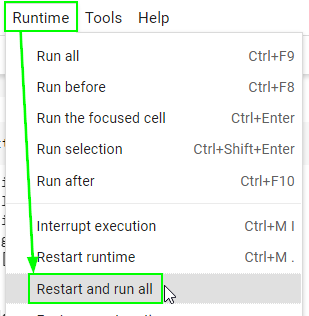

In [21]:
print('🎯 Restart and run all successful')

🎯 Restart and run all successful


In [22]:
# GRADER_ONLY
import os
from datetime import datetime
autograder_output_filename = f"{assignment_name}-autograder-results.csv"

netid = autograded_result["netid"]
assignment_name = autograded_result["assignment_name"]
student_score = autograded_result["student_score"]
total_available = autograded_result["total_available"]
graded_time = datetime.now().strftime("%Y-%m-%d %H:%M")
feedback = '''Assignment: {0}
NetID: {1}
Total Score: {2}/{3}

Grade Breakdown'''.format(assignment_name, netid, student_score, total_available)

for graded_part_name in autograded_result["order"]:
    part_info = autograded_result["breakdown"][graded_part_name]
    feedback += '''
--------------------------------
Component: {0}
Result: {1}
Score: {2}/{3}'''.format(graded_part_name, "Pass" if part_info["did_pass"] else "Fail", part_info["points"], part_info["available_points"])

    feedback += "" if part_info["did_pass"] else f"\nError Message: {part_info['message']}"

if is_autograder_env:
    df_agr_new = pd.DataFrame([{
        "netid": netid,
        "assignment_name": assignment_name,
        "student_score": student_score,
        "total_available": total_available,
        "graded_time": graded_time,
        "feedback": feedback
    }])
    
    if not os.path.exists(autograder_output_filename):
        df_agr = df_agr_new
    else:
        df_agr = pd.read_csv(autograder_output_filename)
        df_agr = df_agr.loc[~((df_agr["netid"] == netid) & (df_agr["assignment_name"] == assignment_name))]
        df_agr = pd.concat([df_agr, df_agr_new])
        
    df_agr.sort_values("graded_time").to_csv(autograder_output_filename, index=None)